# YOHO training

In [2]:
# Import used libraries

import pandas as pd
print("Pandas version: ", pd.__version__)

import torch
torch.manual_seed(0)

from utils import AudioFile, TUTDataset, YOHODataGenerator

Pandas version:  2.1.2


## Data generator

Number of audio files: 24
Filepath: ./data/tut/TUT-sound-events-2017-development/TUT-sound-events-2017-development.audio.2/TUT-sound-events-2017-development/audio/street/a131.wav
Duration: 240.8083446712018 seconds
Sampling rate: 44100 Hz
Mel spectrogram shape: (40, 24081)


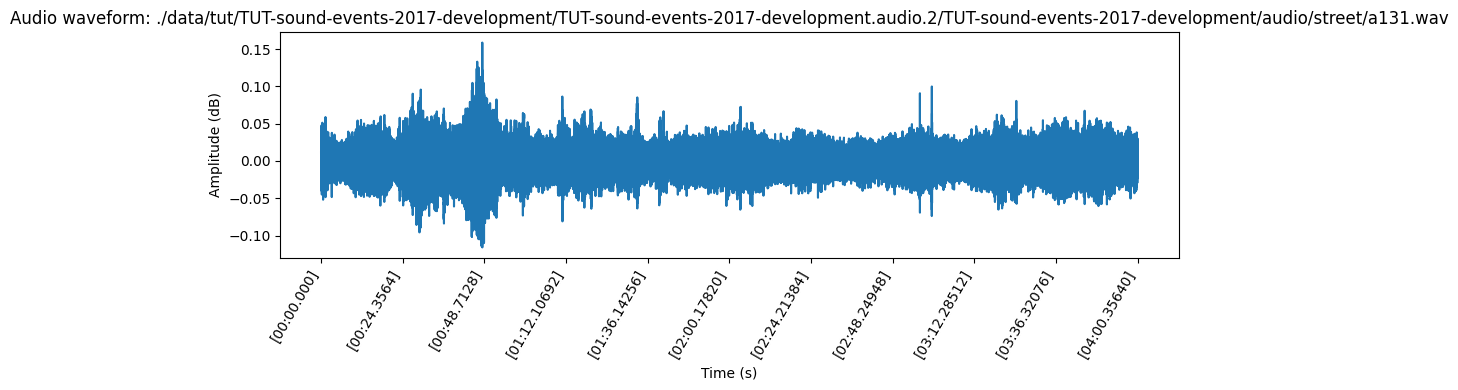

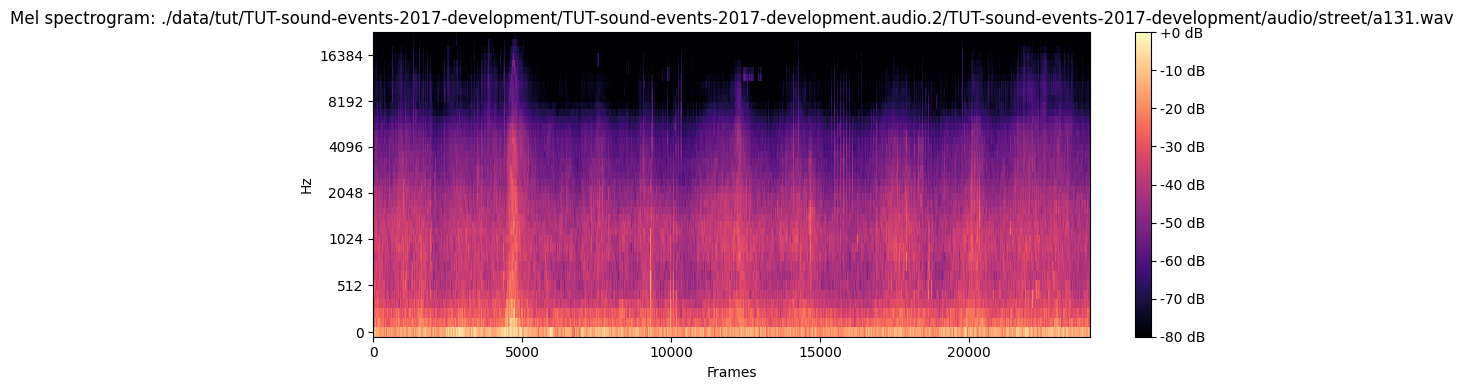

In [3]:
N_MELS = 40
HOP_LENGTH = 441
WIN_LENGTH = 1764

tut_train = TUTDataset(
    audios=[
        AudioFile(filepath=file.filepath, labels=file.events)
        for _, file in pd.read_csv("./data/tut.train.csv").iterrows()
    ],
)

print(f"Number of audio files: {len(tut_train)}")
print(f"Filepath: {tut_train.audios[0].filepath}")
print(f"Duration: {tut_train.audios[0].duration} seconds")
print(f"Sampling rate: {tut_train.audios[0].sr} Hz")
print(
    f"Mel spectrogram shape: {tut_train.audios[0].mel_spectrogram(n_mels=N_MELS, hop_length=HOP_LENGTH, win_length=WIN_LENGTH).shape}"
)
tut_train.audios[0].plot()
tut_train.audios[0].mel_spectrogram(
    n_mels=N_MELS, hop_length=HOP_LENGTH, win_length=WIN_LENGTH
).plot()

In [8]:
train_dataloader = YOHODataGenerator(tut_train, batch_size=1, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))

print(f"Train features shape: {train_features.shape}")
print(f"Train labels shape: {train_labels.shape}")

Train features shape: torch.Size([1, 1, 40, 21096])
Train labels shape: torch.Size([1, 18, 675])
